In [43]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import train_test_split
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [44]:
data=pd.read_csv('C:/Users/User/Desktop/adult.csv',header=0)
data=data.dropna()
print(data.shape)
print(list(data.columns))

(32561, 15)
['age', 'workclass', 'fnlwgt', 'education', 'education.num', 'marital.status', 'occupation', 'relationship', 'race', 'sex', 'capital.gain', 'capital.loss', 'hours.per.week', 'native.country', 'income']


In [45]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [46]:
col_names = data.columns
num_data = data.shape[0]
for c in col_names:
    num_non = data[c].isin(["?"]).sum()
    if num_non > 0:
        print (c)
        print (num_non)
        print ("{0:.2f}%".format(float(num_non) / num_data * 100))
        print ("\n")

workclass
1836
5.64%


occupation
1843
5.66%


native.country
583
1.79%




In [47]:
data = data[data["workclass"] != "?"]
data = data[data["occupation"] != "?"]
data = data[data["native.country"] != "?"]

data.shape
data

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K
6,38,Private,150601,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K
7,74,State-gov,88638,Doctorate,16,Never-married,Prof-specialty,Other-relative,White,Female,0,3683,20,United-States,>50K
8,68,Federal-gov,422013,HS-grad,9,Divorced,Prof-specialty,Not-in-family,White,Female,0,3683,40,United-States,<=50K
10,45,Private,172274,Doctorate,16,Divorced,Prof-specialty,Unmarried,Black,Female,0,3004,35,United-States,>50K
11,38,Self-emp-not-inc,164526,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,0,2824,45,United-States,>50K
12,52,Private,129177,Bachelors,13,Widowed,Other-service,Not-in-family,White,Female,0,2824,20,United-States,>50K


In [48]:
data['income'].value_counts()

<=50K    22654
>50K      7508
Name: income, dtype: int64

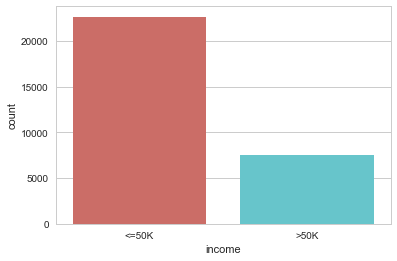

In [49]:
sns.countplot(x='income',data=data,palette='hls')
plt.show()
plt.savefig('count_plot')

In [50]:
data["income"].value_counts()[0] / data.shape[0]

0.75107751475366358

In [51]:
data["income"].value_counts()[1] / data.shape[0]

0.24892248524633645

In [52]:
data.groupby('income').mean()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
income,,,,,,
<=50K,36.60806,190338.646729,9.629116,148.893838,53.448000,39.348592
>50K,43.95911,188149.962174,11.606420,3937.679808,193.750666,45.706580


In [53]:
#The two classes are imbalanced.
#Stratified sampling will be adopted in dividing train and test set to preserve the ratio between two classes


In [54]:
data.replace(['Divorced', 'Married-AF-spouse', 
              'Married-civ-spouse', 'Married-spouse-absent', 
              'Never-married','Separated','Widowed'],
             ['not married','married','married','married',
              'not married','not married','not married'], inplace = True)

In [55]:
import numpy as np
for col in data:
    b, c = np.unique(data[col], return_inverse=True) 
    data[col] = c

data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
1,65,2,6096,11,8,1,3,1,4,0,0,89,17,38,0
3,37,2,6564,5,3,1,6,4,4,0,0,88,39,38,0
4,24,2,15770,15,9,1,9,3,4,0,0,88,39,38,0
5,17,2,13278,11,8,1,7,4,4,0,0,87,44,38,0
6,21,2,7296,0,5,1,0,4,4,1,0,87,39,38,0


In [56]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
array = data.values
X = array[:,0:14]
Y = array[:,14]
rfe = RFE(model)
fit = rfe.fit(X, Y)
i=0
feature=list()
print('Num Features:',fit.n_features_)
for x,y in zip(fit.support_,data):
    if x:
        feature.append(y)
print("Feature Ranking:",fit.ranking_)
print("Selected Features:",feature)

Num Features: 7
Feature Ranking: [1 1 8 5 1 1 7 1 1 1 4 3 2 6]
Selected Features: ['age', 'workclass', 'education.num', 'marital.status', 'relationship', 'race', 'sex']


In [57]:
drop_elements = ['fnlwgt','education', 'native.country','occupation','income', 
                'capital.gain','capital.loss','hours.per.week','native.country']
y = data["income"]
X = data.drop(drop_elements, axis=1)
X.head()

,age,workclass,education.num,marital.status,relationship,race,sex
1,65,2,8,1,1,4,0
3,37,2,3,1,4,4,0
4,24,2,9,1,3,4,0
5,17,2,8,1,4,4,0
6,21,2,5,1,4,4,1


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [59]:
# Logistic Regression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
#y_pred = logreg.predict(X_test)
score_logreg = logreg.score(X_test,y_test)
print('The accuracy of the Logistic Regression is', score_logreg)

The accuracy of the Logistic Regression is 0.82247637991
